# plotting with pandas
A few examples of creating common types of plots using `pandas`' built-in support for `matplotlib`.

## Imports
Import the common modules used for pandas-based data analysis

In [500]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Line plots
The default plot type in `pandas` is the line plot.

In [501]:
# make a simple time series with dummy data - we will use random values for each day of the year 2021
ts = pd.Series(np.random.randn(365), index=pd.date_range("1/1/2021", periods=365), name='vals')
ts

2021-01-01   -0.629180
2021-01-02    1.387393
2021-01-03    0.061965
2021-01-04   -0.408607
2021-01-05   -2.191661
                ...   
2021-12-27   -1.137358
2021-12-28   -0.202651
2021-12-29   -1.182938
2021-12-30   -1.013094
2021-12-31   -0.453083
Freq: D, Name: vals, Length: 365, dtype: float64

Create a simple line plot - the index of the Series will be used as the `x` axis, and the values will be plotting on the `y` axis.

<AxesSubplot:>

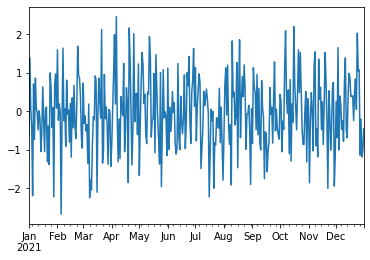

In [502]:
# defaults to line plot
ts.plot()

We can also easily plot the cumulative sum of all prior values at each date.

<AxesSubplot:>

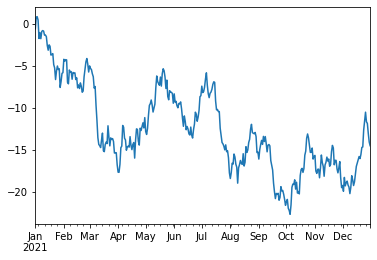

In [503]:
# calculate the cumulative sum of values up to each date
ts = ts.cumsum()
ts.plot()

## Bar chart

In [504]:
# make a dataframe from the Series
df = ts.to_frame()
df.head()

,vals
2021-01-01,-0.629180
2021-01-02,0.758212
2021-01-03,0.820178
2021-01-04,0.411571
2021-01-05,-1.780090


In [505]:
# create a new index, which places the old index, the dates, into a regular column named 'index'
df = df.reset_index()
df

,index,vals
0,2021-01-01,-0.629180
1,2021-01-02,0.758212
2,2021-01-03,0.820178
3,2021-01-04,0.411571
4,2021-01-05,-1.780090
...,...,...
360,2021-12-27,-11.677958
361,2021-12-28,-11.880609
362,2021-12-29,-13.063546
363,2021-12-30,-14.076640


In [506]:
# rename the 'index' column to 'date'
df.rename(columns = {"index": "date"}, inplace=True)
df

,date,vals
0,2021-01-01,-0.629180
1,2021-01-02,0.758212
2,2021-01-03,0.820178
3,2021-01-04,0.411571
4,2021-01-05,-1.780090
...,...,...
360,2021-12-27,-11.677958
361,2021-12-28,-11.880609
362,2021-12-29,-13.063546
363,2021-12-30,-14.076640


In [507]:
# ensure the dates are in a date data type
df["date"] = df["date"].astype("datetime64")

In [508]:
# add a month field
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
df.sample(5)

,date,vals,month
264,2021-09-22,-20.184368,2021-09
307,2021-11-04,-17.336202,2021-11
89,2021-03-31,-16.796262,2021-03
64,2021-03-06,-7.675027,2021-03
227,2021-08-16,-16.942831,2021-08


Group rows by month and calculate the sum of the values in each month

In [509]:
# group rows by month and calculate the sum of the values in each month
g = df.groupby(df['date'].dt.month.rename('month')).agg({'sum'})
g

,vals
,sum
month,
1,-96.977609
2,-170.258604
3,-379.982545
4,-420.102135
5,-264.288568
6,-330.609592
7,-326.593980
8,-479.802648


<AxesSubplot:xlabel='month'>

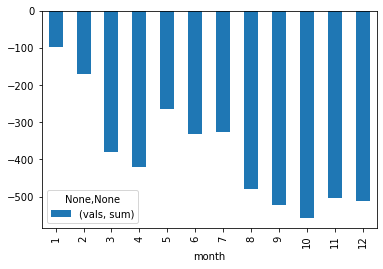

In [510]:
#plot the data
g.plot.bar(y=['vals']) # the index will serve as the x axis, by default

## Real data set
We will use the NYC jobs data set, from the NYC Open Data initiative.

In [511]:
# open data about NYC jobs from https://data.cityofnewyork.us/City-Government/NYC-Jobs/kpav-sd4t
df = pd.read_csv('./NYC_Jobs.csv')
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
261,456344,HRA/DEPT OF SOCIAL SERVICES,Internal,10,CRISIS INTERVENTION NURSE,STAFF NURSE,Non-Competitive-5,50910,00,Health,...,**LOAN FORGIVENESS The federal government prov...,CLICK âAPPLYâ NOW BUTTON Effective 04/06/...,NaN,*Nurses will likely start their shift at 260 1...,NaN,New York City residency is generally required ...,01/07/2021,03-MAY-2021,04/05/2021,04/13/2021
1021,424227,FINANCIAL INFO SVCS AGENCY,External,1,Web Application Developer,SENIOR IT ARCHITECT,Non-Competitive-5,95711,00,"Technology, Data & Innovation",...,P293,External applicants please visit https://a127-...,"Monday - Friday, 9am to 5pm.",NaN,NaN,New York City Residency is not required for th...,11/27/2019,NaN,11/27/2019,04/13/2021
62,460527,DEPT OF ENVIRONMENT PROTECTION,Internal,2,2021-BWT-004-Collection Support Division Intern,SUMMER COLLEGE INTERN,Non-Competitive-5,10234,00,"Engineering, Architecture, & Planning",...,Please attach requested documents (writing sam...,To Apply click the âApply Nowâ button DEP...,35 Hours per week,This position is located at 96-05 Horace Hardi...,NaN,New York City residency is generally required ...,04/07/2021,NaN,04/07/2021,04/13/2021


Only include those jobs with an annual salary.

In [512]:
# let's limit to only annual jobs
df = df[ df['Salary Frequency'] == 'Annual' ]
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
387,460097,HOUSING PRESERVATION & DVLPMNT,External,1,Legal Assistant,ADM MANAGER-NON-MGRL FRM M1/M2,Competitive-1,1002C,02,Legal Affairs,...,***MUST BE CURRENTLY SERVING AS A PERMANENT AD...,Apply Online,NaN,100 Gold Street,NaN,New York City residency is generally required ...,03/24/2021,23-MAY-2021,03/24/2021,04/13/2021
1102,376356,LAW DEPARTMENT,Internal,1,Clerical Associate- Appeals,CLERICAL ASSOCIATE,Competitive-1,10251,03,Legal Affairs,...,NaN,Please click Apply to submit your resume.,Monday - Friday 35 per week,NaN,NaN,New York City residency is generally required ...,12/05/2018,NaN,12/28/2018,04/13/2021
841,446903,DEPARTMENT FOR THE AGING,External,1,"Deputy Director, Press & Public Information",ADMINISTRATIVE PROGRAM OFFICE,Competitive-1,10084,M1,Constituent Services & Community Programs Comm...,...,NaN,All current City Employees may apply by going ...,NaN,NaN,NaN,New York City residency is generally required ...,02/04/2021,05-MAY-2021,02/04/2021,04/13/2021


Include only those jobs that pay more than $100,000 annually.

In [513]:
# let's limit to only jobs that could pay more than 80k
df = df[ df['Salary Range To'] > 100000 ]
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
287,445957,DEPT OF HEALTH/MENTAL HYGIENE,External,1,Chief of Health and Safety,CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,"Health Policy, Research & Analysis",...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/28/2021,28-MAY-2021,01/28/2021,04/13/2021
463,221045,NYC EMPLOYEES RETIREMENT SYS,Internal,1,CERTIFIED IT ADMINISTRATOR (WAN),CERT. IT ADMINISTRATOR WAN,Competitive-1,13642,04,Information Technology & Telecommunications,...,NaN,"Click the Apply Now button, please indicate Jo...",NaN,"335 Adams Street, Brooklyn NY",NaN,New York City Residency is not required for th...,10/30/2015,NaN,10/30/2015,04/13/2021
1146,312210,NYC EMPLOYEES RETIREMENT SYS,External,1,COMPUTER SYSTEMS MANAGER,COMPUTER SYSTEMS MANAGER,Competitive-1,10050,M1,"Technology, Data & Innovation",...,NaN,Please click the apply button and submit your ...,NaN,NaN,NaN,New York City Residency is not required for th...,11/08/2017,NaN,11/09/2017,04/13/2021


Limit our dataframe to include only a few columns of interest.

In [514]:
# let's limit the columns we want
df = df[ ['Agency', '# Of Positions', 'Salary Range To'] ]
df

,Agency,# Of Positions,Salary Range To
0,NYC HOUSING AUTHORITY,1,130000.0
5,OFFICE OF THE COMPTROLLER,1,140000.0
9,FINANCIAL INFO SVCS AGENCY,1,130000.0
10,NYC HOUSING AUTHORITY,1,110000.0
15,NYC HOUSING AUTHORITY,1,109409.0
...,...,...,...
1210,DEPT OF INFO TECH & TELECOMM,5,120000.0
1211,LAW DEPARTMENT,1,126575.0
1212,LAW DEPARTMENT,1,126575.0
1214,ADMIN FOR CHILDREN'S SVCS,1,156793.0


Group together all the jobs within the same agency, and add up the number of positions in each agency.

In [521]:
# group jobs at each agency and calculate the sum of # of jobs at each agency
g = df.groupby(df['Agency']).agg({'sum'})
g.head(10)

,# Of Positions,Salary Range To
,sum,sum
Agency,,
ADMIN FOR CHILDREN'S SVCS,15,1817262.0
BOARD OF CORRECTION,2,300000.0
CIVILIAN COMPLAINT REVIEW BD,1,156829.0
CONSUMER AFFAIRS,6,725214.0
DEPARTMENT FOR THE AGING,6,806000.0
DEPARTMENT OF BUSINESS SERV.,3,485082.0
DEPARTMENT OF CITY PLANNING,3,345000.0
DEPARTMENT OF CORRECTION,12,1463456.0


A horizontal bar chart that shows the number of open positions within each agency of the NYC government:

<AxesSubplot:ylabel='Agency'>

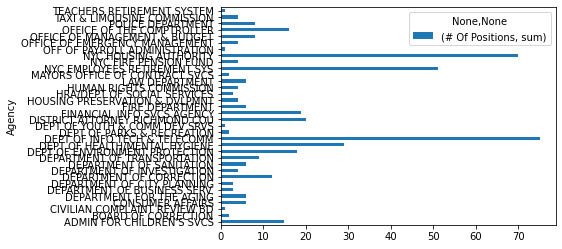

In [516]:
# plot the jobs at each agency
g.plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

A horizontal bar chart that shows the bottom 10 agencies, by number of open positions:
- first we sort the rows by number of positions, in ascending order
- then we grab the first 10 rows, reverse their order, and plot them.

<AxesSubplot:ylabel='Agency'>

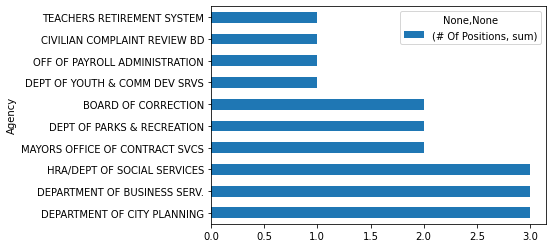

In [527]:
# that is a lot of agencies!
# perhaps limit to just the first few agencies!
g1 = g.sort_values(by=('# Of Positions', 'sum'), ascending=True)
g1[:10][::-1].plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

A horizontal bar chart that shows the top 10 agencies, by number of open positions:
- first we sort the rows by number of positions, in descending order
- then we grab the first 10 rows, reverse their order, and plot them.

<AxesSubplot:ylabel='Agency'>

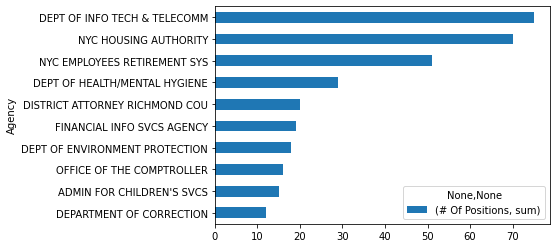

In [528]:
# plot the top agencies by number of positions
g2 = g.sort_values( ('# Of Positions', 'sum'), ascending=False )
g2[ : 10][::-1].plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

A vertical bar chart that shows the bottom 10 agencies, by number of open positions:

<AxesSubplot:xlabel='Agency'>

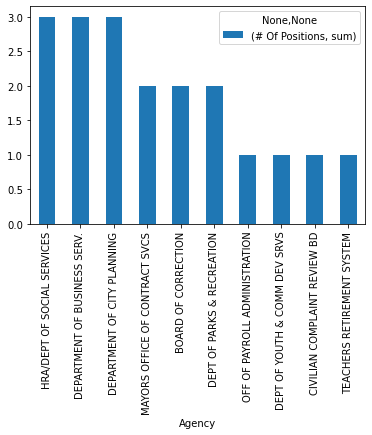

In [536]:
# plot the bottom agencies by number of positions
g2[-10 : ].plot.bar(y=['# Of Positions']) # the index will serve as the x axis, by default

## Pie charts

A pie chart that shows the proportion of available jobs that belong to each agency of NYC government.

<AxesSubplot:ylabel='sum'>

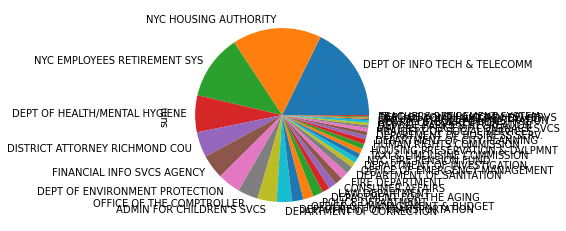

In [481]:
# pie chart of the top 10 agencies, by number of positions over 100k
g2.plot.pie(y='# Of Positions', legend=False)